# 📊 Credit Card Default Prediction System  
### By Pratishtha Srivastava

## Introduction

Financial institutions often face the challenge of identifying customers who are at risk of defaulting on their credit card payments. Accurately predicting such defaults is crucial for minimizing financial losses and managing credit risk effectively.

In this project, I have built a machine learning-based Credit Card Default Prediction System using the UCI dataset. The goal is to classify whether a customer is likely to default in the next month based on their credit history and demographic features.

This end-to-end project follows the **CRISP-DM methodology**, covering every phase from understanding the business problem to evaluating model performance. I have implemented and compared multiple classification models — including **Logistic Regression** and **Random Forest** — to analyze which model best identifies potential defaulters.

The project was developed in **VS Code using Jupyter Notebooks**, with clean markdown documentation and visualizations to support explainability. It's aimed not just as a technical exercise but also to showcase how real-world data science projects are structured and communicated.

> _"The true power of data science lies not just in building models, but in turning business problems into analytical solutions."_  
> — Pratishtha Srivastava


# 1. Business Understanding

This project aims to build a classification model to predict whether a credit card customer will default on their payment next month.

### Problem Statement
Banks need to identify risky customers who are likely to default so that they can take proactive steps (like tightening credit, asking for collateral, etc.)

**Goal**: Build a binary classification model that accurately predicts defaults.


# 2. Data Understanding

We load the UCI Credit Card Default dataset (.xls), understand its shape, features, and check for data types, missing values, and class distribution.


In [4]:
import pandas as pd
import numpy as np

# Load dataset (correct filename + xlrd engine auto-detected after install)
df = pd.read_excel('credit card default.xls', header=1)

# Show first 5 rows
df.head()

 
 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 2. Data Understanding

We will:
- View the dataset shape and column names
- Understand data types
- Check for missing values
- Look at target class distribution (imbalanced or not)


In [5]:
#shape of dataset: rows and columns
print(f'dataset contains{df.shape[0]} rows and {df.shape[1]} columns.')

#column names
print("\n column names")
print(df.columns.tolist())

#info 
df.info()

#datset datatypes
df.dtypes

dataset contains30000 rows and 25 columns.

 column names
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-nu

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

### Understanding the Target Variable: `default`

The target column `default` is a **binary classification label**:
- `0`: Customer did **not** default on their credit card payment
- `1`: Customer **defaulted**

Let’s explore its distribution to understand class imbalance, which impacts model performance.



Target class counts:
 default
0    23364
1     6636
Name: count, dtype: int64


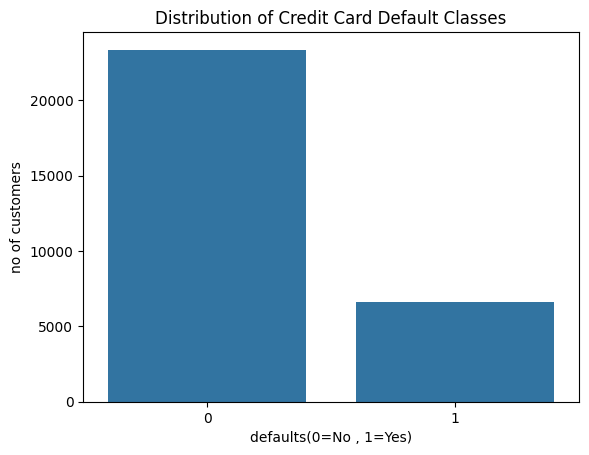


Target class distribution (in %):
default
0    77.88
1    22.12
Name: proportion, dtype: float64


In [6]:
#rename the target 
df.rename(columns={"default payment next month" : "default"} , inplace = True)

# Value counts
print("Target class counts:\n", df['default'].value_counts())

#plot target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='default', data=df)
plt.title('Distribution of Credit Card Default Classes')
plt.xlabel('defaults(0=No , 1=Yes)')
plt.ylabel('no of customers')
plt.show()

# Percentage
default_pct = df['default'].value_counts(normalize=True) * 100
print("\nTarget class distribution (in %):")
print(default_pct)

## 3. Data Preparation & Cleaning

Before training our models, we need to:
- Remove unnecessary columns (like 'ID')
- Check for and handle missing values
- Encode categorical features (if any)
- Scale the features
- Split the data into training and test sets


In [10]:
#Droping id as it is not useful for predictive info
if 'ID' in df.columns:
    df.drop(columns='ID', inplace=True)
    
# Check for null values
print("missing values: ")
print(df.isnull().sum())

 



missing values: 
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [11]:
#separating features and target
X = df.drop('default', axis=1)  # Features
y = df['default']               # Target

#feauture scaling as some ml algorithms are sensitive to feauture magnitudes
from sklearn.preprocessing import StandardScaler
# Initialize scaler
scale= StandardScaler()
# Fit on training data and transform
X_scaled= scale.fit_transform(X)

In [12]:
#Traning and testing (80 and 20)
from sklearn.model_selection import train_test_split

#splitting dataset(80train and 20test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
#random_state=42 Keeps the results consistent every time you run the code.
#stratify=y: Ensures the class distribution (defaults vs. non-defaults) stays balanced in both train and test sets.

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (24000, 23)
Test set shape: (6000, 23)


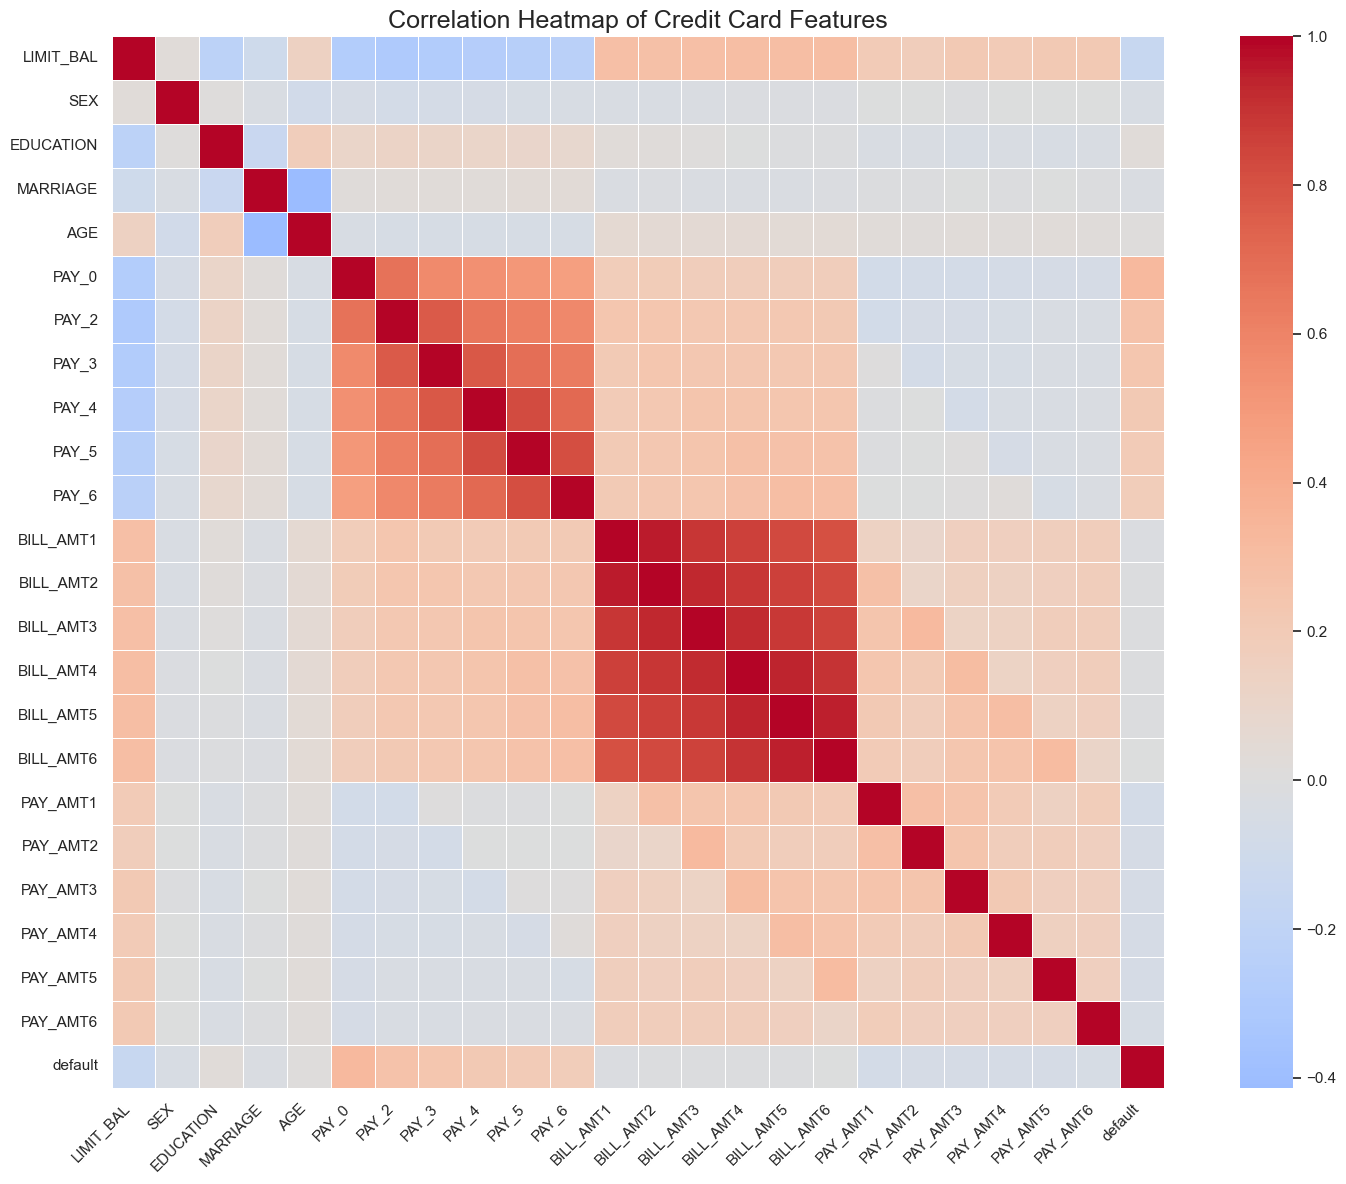

In [16]:
# Set figure size and style
plt.figure(figsize=(16, 12))
sns.set(style='white')

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=False,            # Set to True if you want correlation values shown
    cmap='coolwarm',        # Color scheme
    linewidths=0.5,         # Line between cells
    center=0,               # Center the colormap at 0
    square=True             # Make cells square
)

plt.title("Correlation Heatmap of Credit Card Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 4. Modeling

We will train and compare two classification models:
- Logistic Regression: a simple linear model good for binary classification
- Random Forest: an ensemble method using multiple decision trees

We'll evaluate them using Accuracy, Precision, Recall, F1-score, and ROC AUC.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,  roc_auc_score,  confusion_matrix
#LogisticRegression: Imports the classifier from scikit-learn for binary classification (default or not).
# classification_report: Gives metrics like precision, recall, and F1-score.
# confusion_matrix: Helps visualize prediction results (True Positives, False Negatives, etc.).
# roc_auc_score: Measures model’s ability to distinguish between classes.

# Initialize and train model
log_reg=LogisticRegression(max_iter=1000)
# max_iter=1000 increases the number of iterations so the model converges even with large data.
log_reg.fit(X_train,y_train)


# Predict on test set
y_pred_lr= log_reg.predict(X_test)
y_prob_lr= log_reg.predict_proba(X_test)[:,1]

# y_pred_lr: Stores the final predictions (0 or 1) for the test data.
# y_prob_lr: Stores probability scores for the positive class (1 = default).
# This is used for computing ROC AUC, which evaluates performance at all thresholds.







In [14]:
#evaluating model
print("logistic regression report")
print(classification_report(y_test,y_pred_lr))

# Confusion Matrix
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# ROC AUC Score
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print(f" ROC AUC Score: {roc_auc_lr:.4f}")


logistic regression report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

 Confusion Matrix:
[[4529  144]
 [1009  318]]
 ROC AUC Score: 0.7076


### Logistic Regression Performance Summary

After training a logistic regression model, we evaluated it using precision, recall, F1-score, confusion matrix, and ROC AUC score.

####  Classification Report:
| Metric         | Class 0 (No Default) | Class 1 (Default) |
|----------------|----------------------|-------------------|
| Precision      | 0.82                 | 0.69              |
| Recall         | 0.97                 | 0.24              |
| F1-Score       | 0.89                 | 0.36              |
| Support        | 4673                 | 1327              |

The model performs well at identifying non-defaulters but struggles to detect actual defaulters (low recall of 0.24 for class 1). This could result in high financial risk if not addressed.

#### Confusion Matrix:

- **True Negatives (4529)**: Correctly predicted non-defaulters
- **False Negatives (1009)**: Actual defaulters missed — high financial risk
- **True Positives (318)**: Correctly predicted defaulters
- **False Positives (144)**: Incorrectly predicted as defaulters

####  ROC AUC Score: **0.7076**

This indicates that the model has a fair ability to distinguish between defaulters and non-defaulters. Further improvement is needed — we’ll now train a Random Forest model to see if performance increases.


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,y_train)
# RandomForestClassifier: An ensemble of multiple decision trees.
# n_estimators=100: Uses 100 trees for voting.
# random_state=42: Makes results reproducible.
# fit(...): Trains the random forest on training data.

# Predict
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
# y_pred_rf: Binary predictions (0 or 1).
# y_prob_rf: Probability of class 1, used for ROC AU

print(" Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"ROC AUC Score: {roc_auc_rf:.4f}")


 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

 Confusion Matrix:
[[4396  277]
 [ 851  476]]
ROC AUC Score: 0.7508


###  Random Forest Classifier Evaluation

We trained a Random Forest model to improve upon logistic regression’s performance. The results show better ability to detect defaulters.

#### Classification Report:

| Metric         | Class 0 (No Default) | Class 1 (Default) |
|----------------|----------------------|-------------------|
| Precision      | 0.84                 | 0.63              |
| Recall         | 0.94                 | 0.36              |
| F1-Score       | 0.89                 | 0.46              |
| Support        | 4673                 | 1327              |

- **Improved recall for defaulters (class 1)** from 0.24 → 0.36
- Better F1-score for class 1 (0.46 vs 0.36 in logistic regression)

####  Confusion Matrix:

- **True Positives (476)** increased → better detection of defaulters
- **False Negatives (851)** decreased → fewer risky customers missed

#### ROC AUC Score: **0.7508**

The ROC AUC score confirms that Random Forest is a better fit for this classification task than logistic regression.



## 6. Model Evaluation & Comparison

We trained and evaluated two classification models: **Logistic Regression** and **Random Forest**.

###  Key Metrics Comparison:

| Metric             | Logistic Regression | Random Forest      |
|--------------------|---------------------|--------------------|
| Accuracy           | 0.81                | 0.81               |
| Recall (Class 1)   | 0.24                | **0.36** (↑ Better)|
| F1-score (Class 1) | 0.36                | **0.46** (↑ Better)|
| ROC AUC Score      | 0.7076              | **0.7508** (↑ Better)|

### Conclusion:
While both models had similar overall accuracy, **Random Forest outperformed Logistic Regression** in detecting defaulters (Class 1), which is the main objective of this business problem.

- **Higher Recall** means it captures more risky customers.
- **Higher ROC AUC** indicates better classification performance overall.

**Best Model Selected: Random Forest Classifier**


## 7. Final Conclusion

This credit card default prediction project followed the CRISP-DM methodology:

- We used the UCI dataset to understand patterns of credit default.
- Performed data cleaning, transformation, scaling, and splitting.
- Built and compared two machine learning models: Logistic Regression and Random Forest.

###  Final Model: Random Forest Classifier

- **Better at identifying defaulters** (higher recall & f1-score)
- **More robust performance** with ROC AUC > 0.75

### Next Steps (Optional):
- Test model on real-time data from a bank
- Optimize with hyperparameter tuning (GridSearchCV)
- Consider using XGBoost or Ensemble Learning
